In [2]:
'''
EN: 
In this file we will use the Wisconsin Breast Cancer dataset from kaggle to analyse the data and predict wheter 
the cancer is malign or benign using two different machine learning models.
The data can be found in here: https://www.kaggle.com/uciml/breast-cancer-wisconsin-data

PT:
Nesse arquivo usaremos os dados de Cancer de mama na cidade de Wisconsin, retirado do Kaggle, para analisar e prever
se um dado cancer será maligno ou benífico utilizando dois modelos de aprendizado de máquina.
Os dados podem ser encontrados nesse link: https://www.kaggle.com/uciml/breast-cancer-wisconsin-data
'''

'\nEN: \nIn this file we will use the Wisconsin Breast Cancer dataset from kaggle to analyse the data and predict wheter \nthe cancer is malign or benign using two different machine learning models.\nThe data can be found in here: https://www.kaggle.com/uciml/breast-cancer-wisconsin-data\n\nPT:\nNesse arquivo usaremos os dados de Cancer de mama na cidade de Wisconsin, retirado do Kaggle, para analisar e prever\nse um dado cancer será maligno ou benífico utilizando dois modelos de aprendizado de máquina.\nOs dados podem ser encontrados nesse link: https://www.kaggle.com/uciml/breast-cancer-wisconsin-data\n'

In [3]:
import pandas as pd
import seaborn as sns 
import matplotlib as plt
%matplotlib inline 

In [4]:
# EN: Import the data and create a pandas dataframe
# PT: Importando os dados e criando um pandas dataframe 
df = pd.read_csv('data.csv')

In [5]:
# EN: Let's take a look on the head of the data
# PT: Vamos verificar o cabeçalho dos dados
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [6]:
# EN: Check the information of the dataframe
# PT: Verificar as informações dos dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [7]:
# EN: The last column is filled nly with null values, that means that we can remove it.
# PT: A última coluna está preenchida somente com valores nulos, portanto podemos removê-la
df.drop('Unnamed: 32', axis=1, inplace=True)

In [8]:
'''
EN:
From the information on kaggle and from the analysis above we can see that the data has 10 features and each feature 
has a column for mean, standard error and worst (mean of the tree largest values).
So we end up with 30 numerical fetuatures and from the info() we can see that the dataset do not have null values.
That means that the data is pretty much ready to be inserted in a model

PT: 
Pelas informções obtidas no site em que os dados foram extraídos e pela análise acima, pode-se observar que 
os dados possuem 10 propriedades e cada propreidade possui uma coluna com a média, erro parão e pior caso (média dos 
três maiores valores).
Portanto, nós teremos 30 colunas com valores numéricos e com base na análise das informações os dados não possuem valores 
nulos.
Isso significa que os dados estão basicamente prontos para serem inseridos em um modelo de apredizado de máquina.
''' 

'\nEN:\nFrom the information on kaggle and from the analysis above we can see that the data has 10 features and each feature \nhas a column for mean, standard error and worst (mean of the tree largest values).\nSo we end up with 30 numerical fetuatures and from the info() we can see that the dataset do not have null values.\nThat means that the data is pretty much ready to be inserted in a model\n\nPT: \nPelas informções obtidas no site em que os dados foram extraídos e pela análise acima, pode-se observar que \nos dados possuem 10 propriedades e cada propreidade possui uma coluna com a média, erro parão e pior caso (média dos \ntrês maiores valores).\nPortanto, nós teremos 30 colunas com valores numéricos e com base na análise das informações os dados não possuem valores \nnulos.\nIsso significa que os dados estão basicamente prontos para serem inseridos em um modelo de apredizado de máquina.\n'

In [9]:
# EN: Let's take a look on the 'perimeter' feature. First the distribution and then the mean.
# PT: Vamos visualizar algumas no atributo 'perímetro'. Primeiro a distribuição e depois a média.

[]

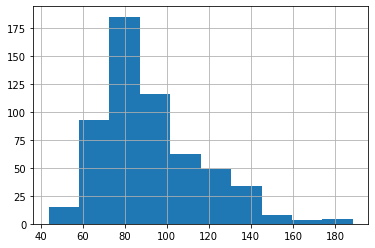

In [10]:
df['perimeter_mean'].hist().plot()

[]

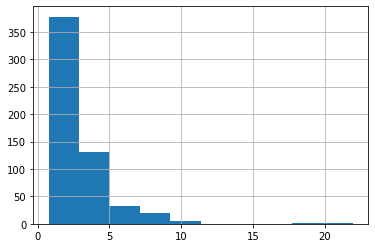

In [11]:
df['perimeter_se'].hist().plot()

[]

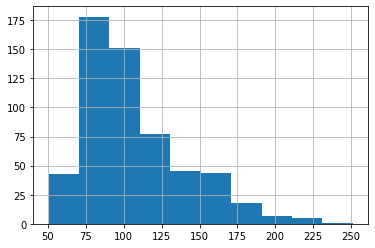

In [12]:
df['perimeter_worst'].hist().plot()

[]

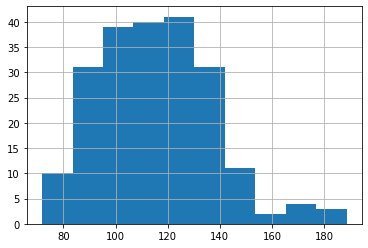

In [13]:
# EN: 'perimeter_mean' distribuition for Malign cancers
# PT: Distrubuição da 'média_perímetro' para canceres malignos 
df[df['diagnosis'] == 'M']['perimeter_mean'].hist().plot()

[]

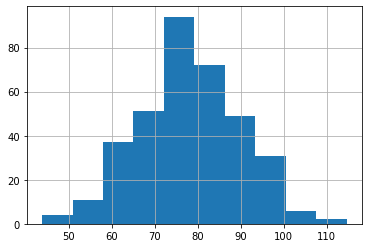

In [14]:
# EN: 'perimeter_mean' distribuition for benign cancers
# PT: Distrubuição da 'média_perímetro' para canceres benignos 
df[df['diagnosis'] == 'B']['perimeter_mean'].hist().plot()

In [15]:
# EN: 'perimeter_mean' mean
# PT: Média da 'média_perímetro'
df['perimeter_mean'].mean()

91.96903339191566

In [16]:
# EN: 'perimeter_mean' mean for malign cancers
# PT: Média da 'média_perímetro' para canceres malignos
df[df['diagnosis']=='M']['perimeter_mean'].mean()

115.36537735849062

In [17]:
# EN: 'perimeter_mean' mean for benign cancers
# PT: Média da 'média_perímetro' para canceres benignos
df[df['diagnosis']=='B']['perimeter_mean'].mean()

78.07540616246497

In [18]:
'''
EN:
As we can see from the distribution and the from the mean of the 'perimeter_mean' column, malign cancer tend to have langer
perimeter_mean. 
We also can conclude that if the perimeter_mean is langer than 100 the cancer is almost certain to be malign. 
PT:
Como podemos ver pela distribuição e pela média da coluna 'média_perímetro', canceres malignos tendem a ter uma
'média_perímetro' maior.
Além disso, podemos concluir que se o valor da 'média_perímetro' for maior que 100 o cancer será quase certamente maligno.
'''

"\nEN:\nAs we can see from the distribution and the from the mean of the 'perimeter_mean' column, malign cancer tend to have langer\nperimeter_mean. \nWe also can conclude that if the perimeter_mean is langer than 100 the cancer is almost certain to be malign. \nPT:\nComo podemos ver pela distribuição e pela média da coluna 'média_perímetro', canceres malignos tendem a ter uma\n'média_perímetro' maior.\nAlém disso, podemos concluir que se o valor da 'média_perímetro' for maior que 100 o cancer será quase certamente maligno.\n"

In [19]:
# EN: let's see the mean standard error on the perimeter
# PT: vamos verificar qual é o erra padrão para o perímetro
df['perimeter_se'].mean()

2.8660592267135288

In [20]:
# EN: Considering values from 80 to 140 for the perimeter, our standard error is relatively low
# PT: Considerando valores entre 80 e 140 para o perímetro, o erro padrão é relativamente baixo

In [21]:
# EN: Before spliting our data and insert it in the first model let's see the amount of malign and benign cancers in the data 
# PT: Antes de dividirmos nossos dados vamos avaliar a quantidade de canceres malignos e benignos nos nossos dados
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

### df['diagnosis'].value_counts()

In [22]:
#The information above will be import to analyse the performance of our models

In [23]:
'''
EN:
For this classification problem I am going to use two different models and compare the results.
For now I will not focus on parameter optmization.
Since in this problem we are dealing with a delicate problem such as cancer diagnosis it is import that we have a really 
high precision.
Model 1: The first model we will use is the 'DecissionTreeClassifier' from the scikit-learn library
Model 2: The Second model will be XGBoost

PT:
Para esse problema de classificação eu vou utilizar dois modelos diferentes e comparar os resultados.
Por enquanto eu não vou me preocupar com a otimização dos parâmetros dos modelos
Nesse caso estamos lidando com um problema delicado como o diagnóstico de uma doença, portanto é necessário que se tenha 
uma precisão alta.
Modelo 1: O primeiro modelo que usaremos será o 'DecissionTreeClassifier' da biblioteca Scikit-learn
Modelo 2: O segundo modelo será o XGBoost
'''

"\nEN:\nFor this classification problem I am going to use two different models and compare the results.\nFor now I will not focus on parameter optmization.\nSince in this problem we are dealing with a delicate problem such as cancer diagnosis it is import that we have a really \nhigh precision.\nModel 1: The first model we will use is the 'DecissionTreeClassifier' from the scikit-learn library\nModel 2: The Second model will be XGBoost\n\nPT:\nPara esse problema de classificação eu vou utilizar dois modelos diferentes e comparar os resultados.\nPor enquanto eu não vou me preocupar com a otimização dos parâmetros dos modelos\nNesse caso estamos lidando com um problema delicado como o diagnóstico de uma doença, portanto é necessário que se tenha \numa precisão alta.\nModelo 1: O primeiro modelo que usaremos será o 'DecissionTreeClassifier' da biblioteca Scikit-learn\nModelo 2: O segundo modelo será o XGBoost\n"

In [24]:
# EN: To split our data in to the train and test parts let's use the train_test_split tool from scikit-learn
# PT: Para dividir os dados nas partes de treino e teste usaremos a ferramenta 'train_test_split' da biblioteca 'scikit-learn'
from sklearn.model_selection import train_test_split

In [25]:
# EN: Creating the input and output dataframes 
# PT: Criando os dataframes de entradas e de saída
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

In [26]:
# EN: Spliting the data 
# PT: Dividindo os dados 
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.3, random_state=101)

In [27]:
# EN: importing the first model we are going to use 
# PT: Importanto o primeiro modelo que utilizaremos 
from sklearn.tree import DecisionTreeClassifier

In [28]:
# EN: Criating the model called 'dtree'
# PT: Criando o modelo chamado 'dtree'
dtree = DecisionTreeClassifier()

In [29]:
# EN: Fitting the training data 
# PT: Colocando os dados de treino no modelo
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [30]:
# EN: Use the test part of the data to make predctions and assigning it to a variable 
# PT: Usando a parte de testes dos dados para fazer as prediçoes e atriuindo essas predições a uma variável
predictions = dtree.predict(X_test)

In [31]:
# EN: Importing the tools to evaluate our predictions
# PT: Importando a ferramenta para avaliar as predições
from sklearn.metrics import classification_report

In [32]:
# EN: Performance evaluation using classification_report. Here we compare our y_test (output variable) with our preditions
# PT: Avalição da performance utilizando 'classification_report'. Aqui comparamos o y_test (variável de saída) com as predições.
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           B       0.92      0.92      0.92       105
           M       0.88      0.86      0.87        66

    accuracy                           0.90       171
   macro avg       0.90      0.89      0.89       171
weighted avg       0.90      0.90      0.90       171



In [33]:
'''
EN: As we can see the 'DecisionTreeClassifier' gave us a precision of 92% for benign and 88% for malign 
PT: Como podemos observar o modelo 'DecisionTreeClassifier' nos deu uma precisão de 92% para canceres benignos e 88% para
malignos
'''

"\nEN: As we can see the 'DecisionTreeClassifier' gave us a precision of 92% for benign and 89% for malign \nPT: Como podemos observar o modelo 'DecisionTreeClassifier' nos deu uma precisão de 92% para canceres benignos e 89% para\nmalignos\n"

In [34]:
# EN: Now let's try to improve that using XGBoost
# PT: Vamos tentar melhorar isso usando XGBoost
from xgboost import XGBClassifier

In [35]:
''' 
EN:
Let's create the model.
The only parameter we are define is the evaluation metrics that will be set igual to Multiclass Logloss
You can find more information about this choise in the links bellow:
https://xgboost.readthedocs.io/en/latest/parameter.html
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.log_loss.html

PT:
Vamos criar o modelo.
O único parametro que vamos definir é a métrica de avaliação que será definido como 'Múlticlasses Logloss'.
Mais informações sobre métrica de avaliação para modelos de classificação podem ser encontradas nos links a seguir:
https://xgboost.readthedocs.io/en/latest/parameter.html
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.log_loss.html
'''
model = XGBClassifier(eval_metrics = 'mlogloss') 

In [36]:
# EN: Fitting the training data 
# PT: Colocando os dados de treino no modelo
model.fit(X_train, y_train)

[11:29:56] WARNING: ..\src\learner.cc:541: 
Parameters: { eval_metrics } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:29:56] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Particular\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metrics='mlogloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [37]:
# EN: Use the test part of the data to make predctions and assigning it to a variable 
# PT: Usando a parte de testes dos dados para fazer as prediçoes e atriuindo essas predições a uma variável
pred_XGB = model.predict(X_test)

In [38]:
# EN: Performance evaluation using classification_report. Here we compare our y_test (output variable) with our preditions
# PT: Avalição da performance utilizando 'classification_report'. Aqui comparamos o y_test (variável de saída) com as predições.
print(classification_report(y_test, pred_XGB))

              precision    recall  f1-score   support

           B       0.98      0.97      0.98       105
           M       0.96      0.97      0.96        66

    accuracy                           0.97       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171



In [39]:
'''
EN:
As we can see the the XGBoost performed better than the Decision tree, but for this problem we may want to work 
a little bit more on our model and try to improve even further. 
But for now, that all folks
¯\_(ツ)_/¯


PT:
Como podemos perceber o modelo XGBoost apresentou uma performance mehor que o DecisionTree, mas para esse problema talvez
seja interessante trabalhar um pouco mais no modelo e tentar melhorar um pouco mais as predições.
Mas, por enquanto, isso é tudo pessoal.
¯\_(ツ)_/¯
'''

'\nEN:\nAs we can see the the XGBoost performed better than the Decision tree, but for this problem we may want to work \na little bit more on our model and try to improve even further. \nBut for now, that all folks\n¯\\_(ツ)_/¯\n\n\nPT:\nComo podemos perceber o modelo XGBoost apresentou uma performance mehor que o DecisionTree, mas para esse problema talvez\nseja interessante trabalhar um pouco mais no modelo e tentar melhorar um pouco mais as predições.\nMas, por enquanto, isso é tudo pessoal.\n¯\\_(ツ)_/¯\n'